In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
dtype = {
    'rate-reason-deletions': 'Int64',
    'rate-RAT-introductions': 'Int64',
    'rate-RUP-introductions': 'Int64',
}
checkers = 'rate', 'rate-d', 'drat-trim', 'gratgen'
df = pd.read_csv('results.csv', dtype=dtype)

df['time-delta-rate-rate-d'] = df['rate-time'] - df['rate-d-time']
df['time-delta-percent-rate-rate-d'] = (df['rate-time'] - df['rate-d-time']) / df['rate-time']
df['time-delta-percent-d-rate-rate-d'] = (df['rate-time'] - df['rate-d-time']) / df['rate-d-time']
df['space-delta-rate-rate-d'] = df['rate-space'] - df['rate-d-space']
df['rate-reason-deletions-not-shrinking-trail'] = (df['rate-reason-deletions'] -
   df['rate-reason-deletions-shrinking-trail'])

verified = 'verified'
verified = 'lrat-check pending' # not run again

vf = df[ (df['rate-result'] == verified)
         & (df['rate-d-result'] == verified)
         & (df['drat-trim-result'] == verified)
         & (df['gratgen-result'] == 'verified')
]
rvf = df[ (df['rate-result'] == verified) & (df['rate-d-result'] == verified) ]


In [157]:
checkers = 'rate', 'rate-d', 'drat-trim', 'gratgen'
LABELS = {
    'space': 'memory usage (MB)',
    'time': 'runtime (s)',
    'rate-reason-deletions': 'reason deletions',
    'rate-reason-deletions-shrinking-trail': 'non-redundant reason deletions',
    'rate-reason-deletions-not-shrinking-trail': 'redundant reason deletions',
}

for c1 in checkers:
    LABELS[f'{c1}-time'] = f'{c1} runtime (s)'
    LABELS[f'{c1}-space'] = f'{c1} memory usage (MB)'
    for c2 in checkers:
        LABELS[f'time-delta-{c1}-{c2}'] = f'runtime overhead of {c1} compared to {c2}'
        LABELS[f'time-delta-percent-{c1}-{c2}'] = f'ratio of runtime overhead of {c1} compared to {c2}'
        LABELS[f'space-delta-{c1}-{c2}'] = f'memory usage overhead of {c1} compared to {c2}'

def sort_by_col(df, col):
    tmp = df.sort_values(col)
    tmp['index'] = np.arange(len(tmp))
    return tmp

def set_labels(ax, x=None, y=None):
    if x is not None:
        ax.set_xlabel(LABELS[x])
    if y is not None:
        ax.set_ylabel(LABELS[y])

def compare(df, y, cs=checkers, **kwargs):
    ax = plt.subplot()
    x = list(range(len(df)))
    for checker in cs:
        sort_by_col(df, f'{checker}-{y}').plot(x='index', y=f'{checker}-{y}', ax=ax, **kwargs)
    plt.xlabel('proofs verified by all checkers')
    set_labels(ax, y=y)

def crossplot(df, x, y):
    limit = max(df[x].max(), df[y].max()) * 1.02
    ax = df.plot(x, y, kind='scatter', marker='1', xlim=(0, limit), ylim=(0, limit))
    ax.plot((0, limit), (0, limit), color='green', linestyle='dashed', linewidth=1)
    set_labels(ax, x, y)

def correlation(df, x, y, **kwargs):
    ax = plt.subplot()
    rvf.plot(x, y, ax=ax, kind='scatter', marker='3', **kwargs);
    limit = df[x].max()
    ax.plot((0, limit), (0, 0), color='green', linestyle='dashed', linewidth=1)
    set_labels(ax, x, y)

SAVE_FIGURES = 1
def persist(name, needSVG=True, needPNG=False):
    if SAVE_FIGURES:
        if needSVG: plt.savefig(f'p/{name}.svg')
        if needPNG: plt.savefig(f'p/{name}.png')

In [122]:
vf[[f'{checker}-time' for checker in checkers]].describe()

,rate-time,rate-d-time,drat-trim-time,gratgen-time
count,373.000000,373.000000,373.000000,373.000000
mean,1480.778311,1451.379893,1541.566756,1030.959946
std,2243.387256,2273.884713,2558.170746,1735.375688
min,0.330000,0.260000,0.450000,0.310000
25%,122.350000,118.200000,129.970000,80.600000
50%,714.270000,705.530000,682.050000,454.910000
75%,1762.500000,1657.770000,1575.600000,1142.760000
max,15679.970000,19368.360000,14770.100000,11609.950000


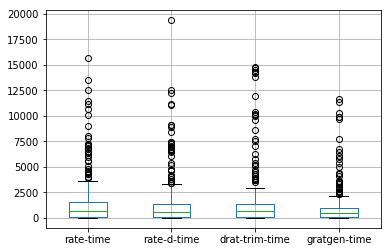

In [123]:
rupf = vf[vf['rate-RAT-introductions'] == 0]
rupf[[f'{checker}-time' for checker in checkers]].boxplot(); persist('box-time')

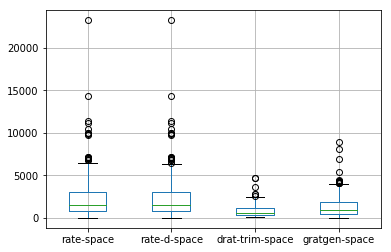

In [86]:
vf[[f'{checker}-space' for checker in checkers]].boxplot(); persist('box-space')

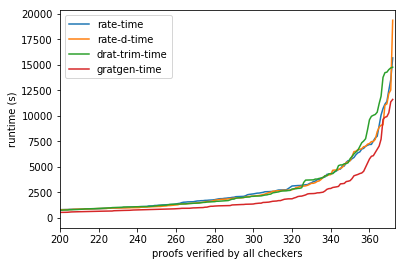

In [160]:
compare(vf, 'time', xlim=(200, len(vf))); persist('cactus-time')

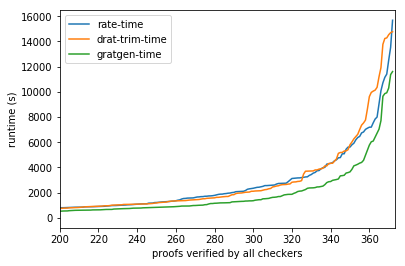

In [158]:
compare(vf, 'time', cs=('rate', 'drat-trim', 'gratgen'), xlim=(200, len(vf))); persist('cactus-time', needSVG=0, needPNG=1)

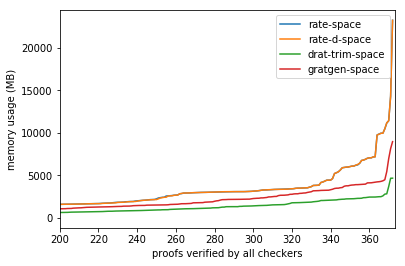

In [159]:
compare(vf, 'space', xlim=(200, len(vf))); persist('cactus-space')

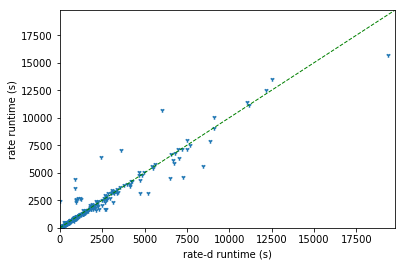

In [89]:
crossplot(vf, 'rate-d-time', 'rate-time'); persist('cross-rate-d-rate')

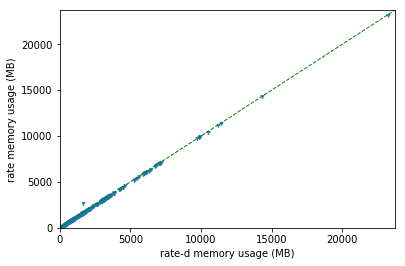

In [90]:
crossplot(vf, 'rate-d-space', 'rate-space');

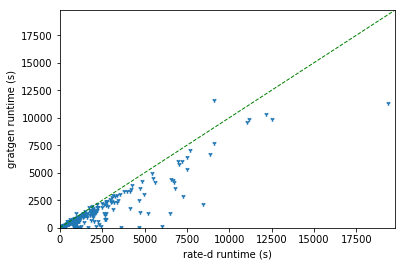

In [91]:
crossplot(vf, 'rate-d-time', 'gratgen-time'); persist('cross-rate-d-gratgen')

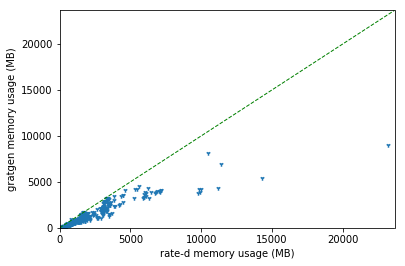

In [92]:
crossplot(vf, 'rate-d-space', 'gratgen-space');

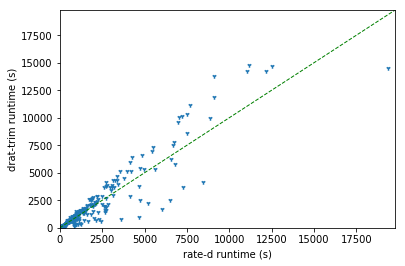

In [93]:
crossplot(vf, 'rate-d-time', 'drat-trim-time'); persist('cross-rate-d-drat-trim')

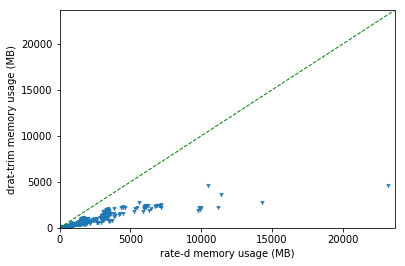

In [94]:
crossplot(vf, 'rate-d-space', 'drat-trim-space');

# Correlation

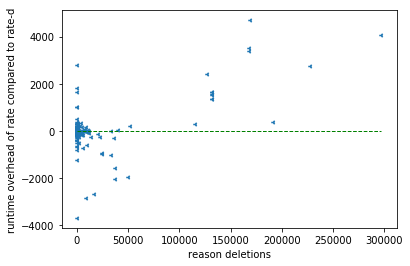

In [113]:
correlation(rvf, 'rate-reason-deletions', 'time-delta-rate-rate-d'); persist('correlation-reason-deletions-time-delta'); persist('correlation-reason-deletions-time-delta', needPNG=1)

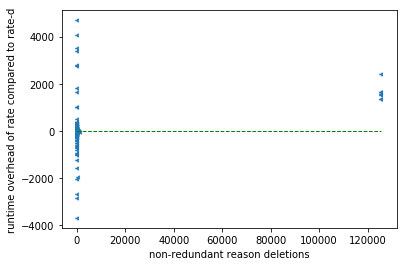

In [145]:
 correlation(rvf, 'rate-reason-deletions-shrinking-trail', 'time-delta-rate-rate-d');

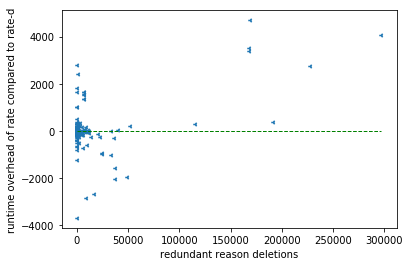

In [144]:
correlation(rvf, 'rate-reason-deletions-not-shrinking-trail', 'time-delta-rate-rate-d'); #persist('correlation-reason-deletions-time-delta'); persist('correlation-reason-deletions-time-delta', needPNG=1)

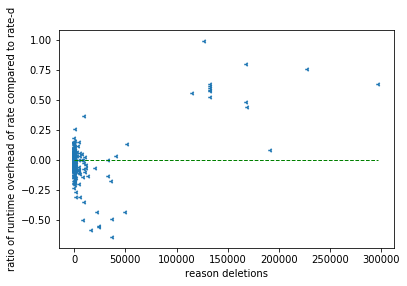

In [96]:
correlation(rvf, 'rate-reason-deletions', 'time-delta-percent-rate-rate-d');

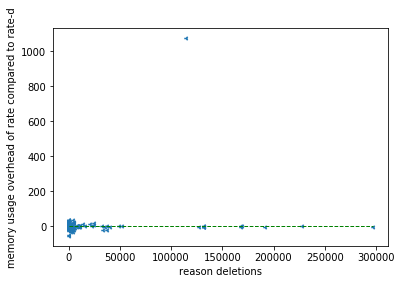

In [97]:
correlation(rvf, 'rate-reason-deletions', 'space-delta-rate-rate-d'); persist('correlation-reason-deletions-space-delta')